In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
drive.mount('/content/drive')

# Path ke folder yang dibagikan
IMG_DIR = '/content/drive/My Drive/Colab Notebooks/lettuce_experimental'
TRAIN_DIR = os.path.join(IMG_DIR, 'train')
VALID_DIR = os.path.join(IMG_DIR, 'test')
TEST_DIR = os.path.join(IMG_DIR, 'valid')

# IMG_DIR = "/kaggle/input/lettuce-npk-dataset/FNNPK"  # Direktori dataset

# Pembuatan generator data dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    # validation_split=0.2  # 20% untuk validasi
)

# Pembuatan train dan validation generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(256, 256),
    batch_size=32,
)

validation_generator = train_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(256, 256),
    batch_size=32,
)

testing_generator = train_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(256, 256),
    batch_size=32
)

Mounted at /content/drive
Found 2026 images belonging to 4 classes.
Found 115 images belonging to 4 classes.
Found 87 images belonging to 4 classes.


**CALLBACKS**

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, monitor1, monitor2, target, monitor3, target1):
        super(CustomCallback, self).__init__()
        self.monitor1 = monitor1
        self.monitor2 = monitor2
        self.monitor3 = monitor3
        self.target = target
        self.target1 = target1

    def on_epoch_end(self, epoch, logs=None):
        current1 = logs[self.monitor1]
        current2 = logs[self.monitor2]
        current3 = logs[self.monitor3]
        if current1 is not None and current2 is not None and current3 is not None:
            if current1 > self.target and current2 > self.target and current3 <= self.target1:
                print(f'{current1} and {current2} has reached {self.target}. {current3} has reached {self.target1}. Stopping training early.')
                self.model.stop_training = True

stop_when_80 = CustomCallback(monitor1='accuracy', monitor2='val_accuracy', target=0.9, monitor3='val_loss', target1=0.15)

**SCRATCH MODEL**

In [ ]:
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Input(shape=(300, 300, 3)))

# model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512, activation='relu'))

# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(1024, activation='relu'))

# Output
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(256, 256, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(512, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    callbacks=[stop_when_80]
)

Epoch 1/100
64/64 [==============================] - 49s 689ms/step - loss: 0.1602 - accuracy: 0.9472 - val_loss: 2.8347 - val_accuracy: 0.6696
Epoch 2/100
64/64 [==============================] - 44s 682ms/step - loss: 0.1425 - accuracy: 0.9501 - val_loss: 1.5924 - val_accuracy: 0.7913
Epoch 3/100
64/64 [==============================] - 43s 668ms/step - loss: 0.1410 - accuracy: 0.9506 - val_loss: 0.9066 - val_accuracy: 0.7826
Epoch 4/100
64/64 [==============================] - 46s 711ms/step - loss: 0.1946 - accuracy: 0.9373 - val_loss: 1.3046 - val_accuracy: 0.6174
Epoch 5/100
64/64 [==============================] - 46s 708ms/step - loss: 0.1471 - accuracy: 0.9437 - val_loss: 0.8213 - val_accuracy: 0.7391
Epoch 6/100
64/64 [==============================] - 45s 699ms/step - loss: 0.1171 - accuracy: 0.9571 - val_loss: 0.3128 - val_accuracy: 0.8870
Epoch 7/100
64/64 [==============================] - 45s 714ms/step - loss: 0.0856 - accuracy: 0.9694 - val_loss: 0.2638 - val_accuracy:

3/3 [==============================] - 45s 22s/step


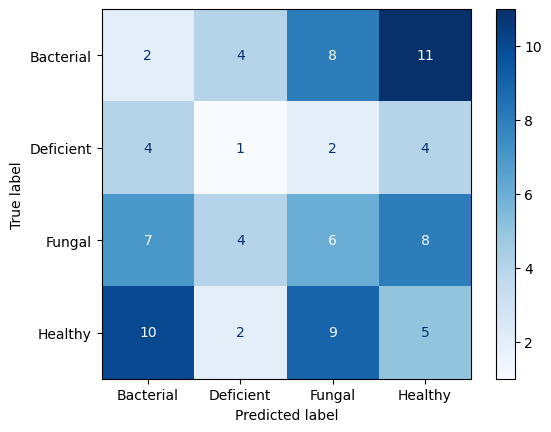

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Pastikan model sudah diload atau dibuat
predictions = model.predict(testing_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = testing_generator.classes
class_labels = list(testing_generator.class_indices.keys())  # Mendapatkan nama kelas

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm.numpy(), display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

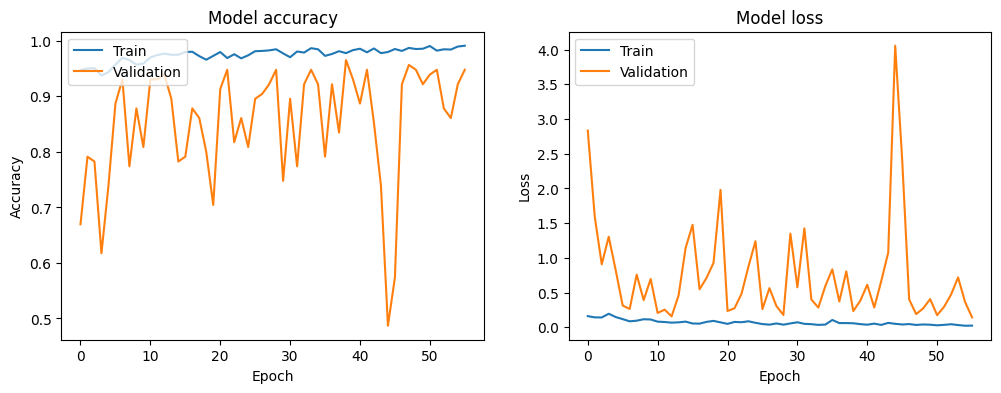

In [ ]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
model.save("model_cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("model_cnn_keras.keras")

In [ ]:
model.save("model_cnn_same_like_before")

In [ ]:
import shutil
shutil.make_archive('model_cnn_same_like_before', 'zip', 'model_cnn_same_like_before')

'/content/model_cnn_same_like_before.zip'

**RESNET50**

In [ ]:
def get_resnet50():
    # Memuat model ResNet50 dengan pre-trained weights dari ImageNet
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

    # Membekukan layer base model
    # for layer in base_model.layers:
    #     layer.trainable = False

    # Menambahkan custom classification layers
    x = base_model.output
    x = tf.keras.layers.Flatten()(x)
    # x = tf.keras.layers.Dense(100, activation='relu')(x)

    # x = tf.keras.layers.GlobalAveragePooling2D()(x)
    # x = tf.keras.layers.Dense(64, activation='relu')(x)
    # x = tf.keras.layers.Dropout(0.5)(x)
    # x = tf.keras.layers.Dense(128, activation='relu')(x)
    # x = tf.keras.layers.Dropout(0.5)(x)
    # x = tf.keras.layers.Dense(256, activation='relu')(x)
    # x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.Dense(4, activation='softmax')(x)

    # Membuat model baru
    model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

    return model

# Mengambil model dan menampilkannya
model = get_resnet50()
# model.summary()


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    batch_size=32,
    callbacks=[stop_when_80]
)

Epoch 1/50
64/64 [==============================] - 86s 877ms/step - loss: 8.0491 - accuracy: 0.6841 - val_loss: 13.9086 - val_accuracy: 0.2174
Epoch 2/50
64/64 [==============================] - 56s 878ms/step - loss: 0.5721 - accuracy: 0.8040 - val_loss: 1.8085 - val_accuracy: 0.3130
Epoch 3/50
64/64 [==============================] - 56s 874ms/step - loss: 0.3792 - accuracy: 0.8741 - val_loss: 1.5076 - val_accuracy: 0.1478
Epoch 4/50
64/64 [==============================] - 57s 878ms/step - loss: 0.2743 - accuracy: 0.9116 - val_loss: 1.3870 - val_accuracy: 0.2174
Epoch 5/50
64/64 [==============================] - 57s 882ms/step - loss: 0.4989 - accuracy: 0.8904 - val_loss: 1.3858 - val_accuracy: 0.3043
Epoch 6/50
64/64 [==============================] - 56s 867ms/step - loss: 0.2756 - accuracy: 0.9245 - val_loss: 2.4669 - val_accuracy: 0.3043
Epoch 7/50
64/64 [==============================] - 54s 840ms/step - loss: 0.3834 - accuracy: 0.8998 - val_loss: 3.5276 - val_accuracy: 0.217

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Pastikan model sudah diload atau dibuat
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Mendapatkan nama kelas

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm.numpy(), display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


**MOBILENETV2**

In [ ]:
def create_mobilenet_v2(num_classes=4):
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(64)(x)
    predictions = tf.keras.layers.Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Membekukan lapisan dasar
    # for layer in base_model.layers:
    #     layer.trainable = False

    return model

model = create_mobilenet_v2(num_classes=4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    # steps_per_epoch=100,  # Sesuaikan dengan data Anda
    validation_data=validation_generator,
    epochs=25)  # Sesuaikan jumlah epoch sesuai kebutuhan

Epoch 1/25
51/51 [==============================] - 33s 642ms/step - loss: 0.1357 - accuracy: 0.9501 - val_loss: 19.4562 - val_accuracy: 0.2174
Epoch 2/25
51/51 [==============================] - 32s 624ms/step - loss: 0.1815 - accuracy: 0.9396 - val_loss: 16.3091 - val_accuracy: 0.2174
Epoch 3/25
51/51 [==============================] - 31s 614ms/step - loss: 0.2212 - accuracy: 0.9229 - val_loss: 32.7963 - val_accuracy: 0.2174
Epoch 4/25
51/51 [==============================] - 31s 612ms/step - loss: 0.1572 - accuracy: 0.9482 - val_loss: 27.0157 - val_accuracy: 0.2174
Epoch 5/25
51/51 [==============================] - 31s 602ms/step - loss: 0.0812 - accuracy: 0.9753 - val_loss: 33.0024 - val_accuracy: 0.2174
Epoch 6/25
51/51 [==============================] - 31s 610ms/step - loss: 0.1017 - accuracy: 0.9636 - val_loss: 32.8594 - val_accuracy: 0.2174
Epoch 7/25
51/51 [==============================] - 33s 637ms/step - loss: 0.0733 - accuracy: 0.9747 - val_loss: 35.8857 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Pastikan model sudah diload atau dibuat
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Mendapatkan nama kelas

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm.numpy(), display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**INCEPTION V3**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import urllib.request

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

# Instantiate the model
pre_trained_model = InceptionV3(input_shape=(300, 300, 3),
                                include_top=False,
                                weights=None)

# load pre-trained weights
pre_trained_model.load_weights(weights_file)

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(4, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

last layer output shape:  (None, 17, 17, 768)


In [ ]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[stop_when_80]
)

Epoch 1/25
64/64 [==============================] - 471s 7s/step - loss: 3.9856 - accuracy: 0.7927 - val_loss: 0.4857 - val_accuracy: 0.8870
Epoch 2/25
64/64 [==============================] - 45s 704ms/step - loss: 0.2973 - accuracy: 0.9363 - val_loss: 0.5406 - val_accuracy: 0.8957
Epoch 3/25
64/64 [==============================] - 45s 704ms/step - loss: 0.1125 - accuracy: 0.9748 - val_loss: 0.3682 - val_accuracy: 0.9304


3/3 [==============================] - 19s 9s/step


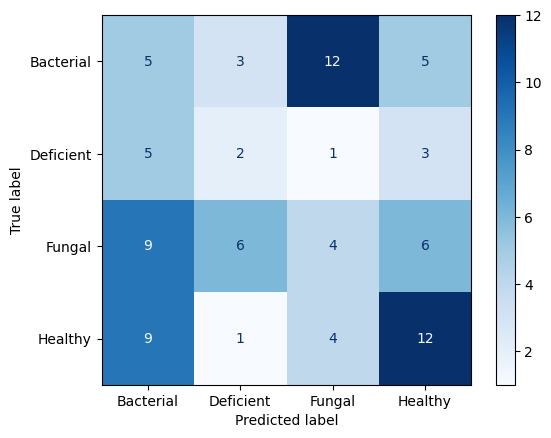

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Pastikan model sudah diload atau dibuat
predictions = model.predict(testing_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = testing_generator.classes
class_labels = list(testing_generator.class_indices.keys())  # Mendapatkan nama kelas

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm.numpy(), display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

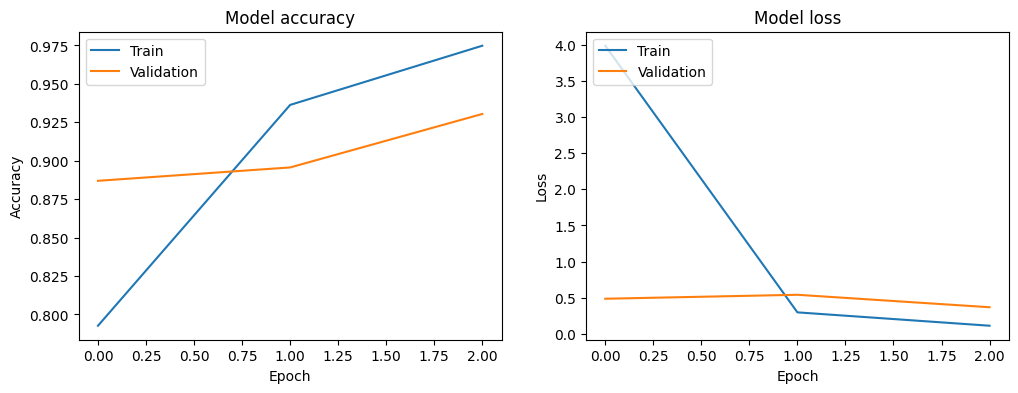

In [ ]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Epoch 1/25
64/64 [==============================] - 78s 763ms/step - loss: 0.2143 - accuracy: 0.9551 - val_loss: 0.4237 - val_accuracy: 0.9130
Epoch 2/25
64/64 [==============================] - 46s 729ms/step - loss: 0.2419 - accuracy: 0.9615 - val_loss: 1.4058 - val_accuracy: 0.8348
Epoch 3/25
64/64 [==============================] - 45s 699ms/step - loss: 0.3354 - accuracy: 0.9521 - val_loss: 0.6865 - val_accuracy: 0.9130
Epoch 4/25
64/64 [==============================] - 45s 700ms/step - loss: 0.0988 - accuracy: 0.9812 - val_loss: 0.1915 - val_accuracy: 0.9217
Epoch 5/25
64/64 [==============================] - 48s 747ms/step - loss: 0.0809 - accuracy: 0.9847 - val_loss: 0.4314 - val_accuracy: 0.8957
Epoch 6/25
64/64 [==============================] - 44s 682ms/step - loss: 0.0642 - accuracy: 0.9896 - val_loss: 0.9230 - val_accuracy: 0.9043
Epoch 7/25
64/64 [==============================] - 44s 683ms/step - loss: 0.0402 - accuracy: 0.9926 - val_loss: 0.3136 - val_accuracy: 0.9043

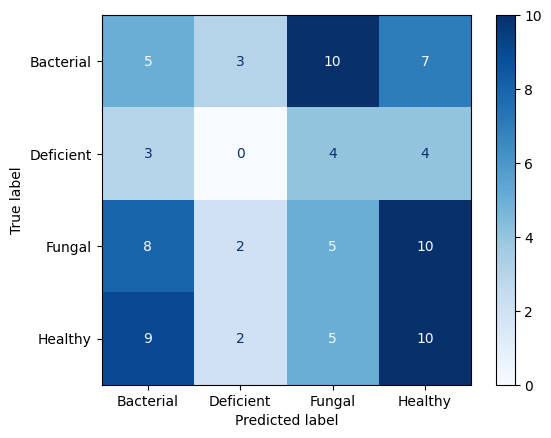

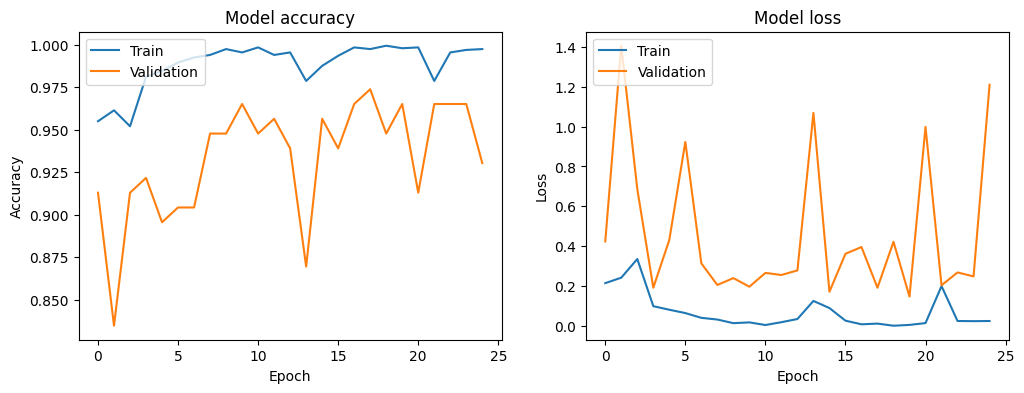

In [ ]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    # callbacks=[stop_when_80]
)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Pastikan model sudah diload atau dibuat
predictions = model.predict(testing_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = testing_generator.classes
class_labels = list(testing_generator.class_indices.keys())  # Mendapatkan nama kelas

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm.numpy(), display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()